# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [12]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [3]:
#1
fraud.nunique()

distance_from_home                1000000
distance_from_last_transaction    1000000
ratio_to_median_purchase_price    1000000
repeat_retailer                         2
used_chip                               2
used_pin_number                         2
online_order                            2
fraud                                   2
dtype: int64

In [4]:
display(fraud["fraud"].value_counts())
display(fraud["online_order"].value_counts())
# We have less than 10% of fraud , so it is an imbalanced dataset.

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

online_order
1.0    650552
0.0    349448
Name: count, dtype: int64

In [5]:
#2 Train a LogisticRegression.
# separate features and target
features = fraud.drop(columns= "fraud")
target = fraud["fraud"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [9]:

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Create an instance of LogisticRegression.
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [13]:
#3 Evaluate the model
log_reg.score(X_test_scaled, y_test)
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182615
         1.0       0.89      0.60      0.72     17385

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000



In [23]:
## 4.** Run **Oversample** in order to balance our target variable and 
# repeat the steps above, now with balanced data. 
# Does it improve the performance of our model?
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
train["fraud"] = y_train.values
train.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,-0.357077,-0.150122,-0.423839,0.366318,1.361603,-0.334533,0.73251,0.0
1,0.194157,-0.185739,-0.433963,0.366318,1.361603,-0.334533,0.73251,0.0
2,0.443734,-0.150915,-0.484329,0.366318,-0.734428,-0.334533,0.73251,0.0
3,-0.402217,-0.166800,-0.460903,-2.729870,1.361603,-0.334533,-1.36517,0.0
4,-0.070140,-0.185709,-0.414141,0.366318,1.361603,-0.334533,-1.36517,0.0


In [24]:
train["fraud"].value_counts()

fraud
0.0    729982
1.0     70018
Name: count, dtype: int64

In [22]:
y_train.values

array([0., 0., 0., ..., 0., 0., 0.])

In [25]:
fraud = train[train["fraud"] == 1]
no_fraud = train[train["fraud"] == 0]

In [26]:
yes_fraud_oversampled = resample(fraud, 
                                    replace=True, 
                                    n_samples = len(no_fraud),
                                    random_state=0)

In [27]:
train_over = pd.concat([yes_fraud_oversampled, no_fraud])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
779963,-0.361720,0.209293,2.749213,0.366318,-0.734428,-0.334533,0.73251,1.0
496591,3.267297,-0.091417,0.353832,0.366318,-0.734428,-0.334533,0.73251,1.0
485804,0.050601,-0.063043,1.377882,0.366318,1.361603,-0.334533,0.73251,1.0
522876,-0.394272,0.095175,0.844943,-2.729870,-0.734428,-0.334533,-1.36517,1.0
241477,2.191924,-0.099482,-0.546546,0.366318,-0.734428,-0.334533,0.73251,1.0
...,...,...,...,...,...,...,...,...
799995,0.686916,-0.071705,-0.606513,0.366318,-0.734428,-0.334533,0.73251,0.0
799996,-0.359697,0.294316,0.106885,0.366318,-0.734428,-0.334533,0.73251,0.0
799997,0.002457,-0.023525,-0.477266,0.366318,-0.734428,2.989238,-1.36517,0.0
799998,-0.223923,-0.185220,-0.010973,0.366318,-0.734428,-0.334533,0.73251,0.0


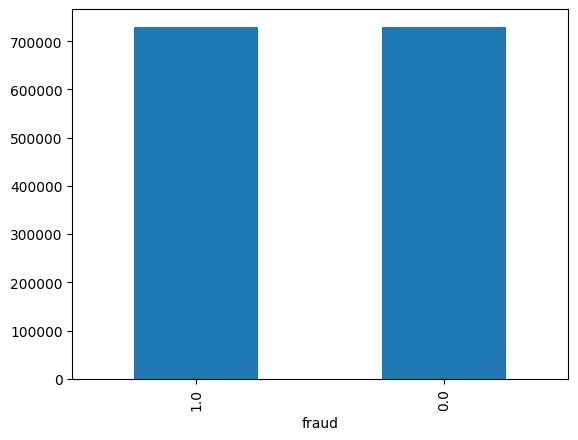

In [28]:
fraud_plt = train_over["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [29]:
# Now, with balanced data, we will create a new instance of Logistic Regression.
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [30]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182615
         1.0       0.57      0.95      0.71     17385

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

Undersampling involves removing data points from the majority class to align its size with that of the minority class

In [31]:
train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,-0.357077,-0.150122,-0.423839,0.366318,1.361603,-0.334533,0.73251,0.0
1,0.194157,-0.185739,-0.433963,0.366318,1.361603,-0.334533,0.73251,0.0
2,0.443734,-0.150915,-0.484329,0.366318,-0.734428,-0.334533,0.73251,0.0
3,-0.402217,-0.166800,-0.460903,-2.729870,1.361603,-0.334533,-1.36517,0.0
4,-0.070140,-0.185709,-0.414141,0.366318,1.361603,-0.334533,-1.36517,0.0
...,...,...,...,...,...,...,...,...
799995,0.686916,-0.071705,-0.606513,0.366318,-0.734428,-0.334533,0.73251,0.0
799996,-0.359697,0.294316,0.106885,0.366318,-0.734428,-0.334533,0.73251,0.0
799997,0.002457,-0.023525,-0.477266,0.366318,-0.734428,2.989238,-1.36517,0.0
799998,-0.223923,-0.185220,-0.010973,0.366318,-0.734428,-0.334533,0.73251,0.0


In [32]:
no_fraud_undersampled = resample(no_fraud, 
                                 replace=False, 
                                 n_samples=len(fraud), 
                                 random_state=0)

no_fraud_undersampled.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
290678,0.264815,-0.177923,0.096183,0.366318,-0.734428,-0.334533,0.73251,0.0
199161,-0.238591,1.546072,-0.556717,0.366318,-0.734428,-0.334533,0.73251,0.0
238970,0.721159,0.005098,-0.547877,0.366318,-0.734428,2.989238,-1.36517,0.0
500779,-0.030997,-0.185533,-0.311518,0.366318,1.361603,-0.334533,0.73251,0.0
251427,-0.284021,-0.174000,-0.436299,0.366318,-0.734428,-0.334533,0.73251,0.0


In [33]:
train_under = pd.concat([no_fraud_undersampled, fraud])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
290678,0.264815,-0.177923,0.096183,0.366318,-0.734428,-0.334533,0.73251,0.0
199161,-0.238591,1.546072,-0.556717,0.366318,-0.734428,-0.334533,0.73251,0.0
238970,0.721159,0.005098,-0.547877,0.366318,-0.734428,2.989238,-1.36517,0.0
500779,-0.030997,-0.185533,-0.311518,0.366318,1.361603,-0.334533,0.73251,0.0
251427,-0.284021,-0.174000,-0.436299,0.366318,-0.734428,-0.334533,0.73251,0.0
...,...,...,...,...,...,...,...,...
799941,-0.342637,0.294419,5.726189,0.366318,1.361603,-0.334533,0.73251,1.0
799947,1.397456,-0.140950,-0.600287,0.366318,-0.734428,-0.334533,0.73251,1.0
799959,-0.301153,-0.180941,0.777658,0.366318,-0.734428,-0.334533,0.73251,1.0
799960,1.829827,-0.185883,-0.444220,0.366318,-0.734428,-0.334533,0.73251,1.0


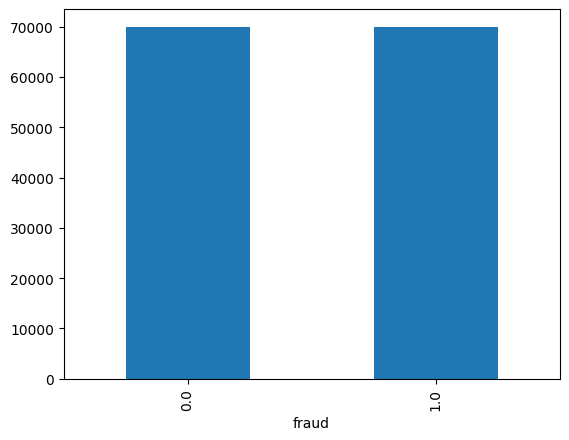

In [34]:
fraud_plt = train_under["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [35]:
#Separate features from target
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [36]:
#Model training
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [37]:
#Evaluate model
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182615
         1.0       0.57      0.95      0.71     17385

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#Smote model
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [ ]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [ ]:
#Train model:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

In [38]:
#Evaluate model
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182615
         1.0       0.57      0.95      0.71     17385

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
